---
format:
  html:
    self-contained: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
# Code Here
#!pip install palmerpenguins
import pandas as pd
import numpy as np
import plotnine as p9

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Species, Island and Sex would need to be dummified.

In [ ]:
penguins = pd.get_dummies(penguins)
penguins = penguins.dropna()
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,0,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
# Code Here
x = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

lr = LinearRegression()
lr_fit = lr.fit(x,y)

pred_lr = lr_fit.predict(x)

penguins["bill_depth_lr"] = pred_lr

#Quadratic Model
penguins['bill_length_squared'] = penguins['bill_length_mm'] ** 2
x = penguins[['bill_length_mm', 'bill_length_squared']]
qr_fit = lr.fit(x,y)

pred_qr = qr_fit.predict(x)
penguins["bill_depth_qr"] = pred_qr

#Cubic Model
penguins['bill_length_cubed'] = penguins['bill_length_mm'] ** 3
x = penguins[['bill_length_mm', 'bill_length_squared', 'bill_length_cubed']]
cb_fit = lr.fit(x,y)

pred_cb = cb_fit.predict(x)
penguins["bill_depth_cb"] = pred_cb

#10 polynomial model
penguins['bill_length_4'] = penguins['bill_length_mm'] ** 4
penguins['bill_length_5'] = penguins['bill_length_mm'] ** 5
penguins['bill_length_6'] = penguins['bill_length_mm'] ** 6
penguins['bill_length_7'] = penguins['bill_length_mm'] ** 7
penguins['bill_length_8'] = penguins['bill_length_mm'] ** 8
penguins['bill_length_9'] = penguins['bill_length_mm'] ** 9
penguins['bill_length_10'] = penguins['bill_length_mm'] ** 10
x = penguins[['bill_length_mm', 'bill_length_squared', 'bill_length_cubed',
              'bill_length_4', 'bill_length_5', 'bill_length_6', 'bill_length_7',
              'bill_length_8', 'bill_length_9', 'bill_length_10']]
poly_fit = lr.fit(x,y)

pred_poly = poly_fit.predict(x)
penguins["bill_depth_poly"] = pred_poly

penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,...,bill_length_cubed,bill_depth_cb,bill_length_4,bill_length_5,bill_length_6,bill_length_7,bill_length_8,bill_length_9,bill_length_10,bill_depth_poly
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,...,59776.471,17.763289,2.337260e+06,9.138687e+07,3.573226e+09,1.397132e+11,5.462784e+12,2.135949e+14,8.351559e+15,18.429545
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,...,61629.875,17.688565,2.434380e+06,9.615801e+07,3.798241e+09,1.500305e+11,5.926206e+12,2.340851e+14,9.246363e+15,18.367979
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,...,65450.827,17.532171,2.637668e+06,1.062980e+08,4.283811e+09,1.726376e+11,6.957294e+12,2.803790e+14,1.129927e+16,18.159955
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,...,49430.863,18.128998,1.814113e+06,6.657794e+07,2.443410e+09,8.967315e+10,3.291005e+12,1.207799e+14,4.432621e+15,18.197926
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,...,60698.457,17.726273,2.385449e+06,9.374816e+07,3.684303e+09,1.447931e+11,5.690369e+12,2.236315e+14,8.788717e+15,18.402425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,...,173741.112,18.604071,9.694754e+06,5.409673e+08,3.018597e+10,1.684377e+12,9.398826e+13,5.244545e+15,2.926456e+17,17.994297
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,...,82312.875,16.893127,3.580610e+06,1.557565e+08,6.775409e+09,2.947303e+11,1.282077e+13,5.577034e+14,2.426010e+16,16.597140
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,...,122023.936,16.420601,6.052387e+06,3.001984e+08,1.488984e+10,7.385361e+11,3.663139e+13,1.816917e+15,9.011908e+16,16.558233
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,...,131096.512,16.572067,6.659703e+06,3.383129e+08,1.718630e+10,8.730638e+11,4.435164e+13,2.253063e+15,1.144556e+17,17.423520


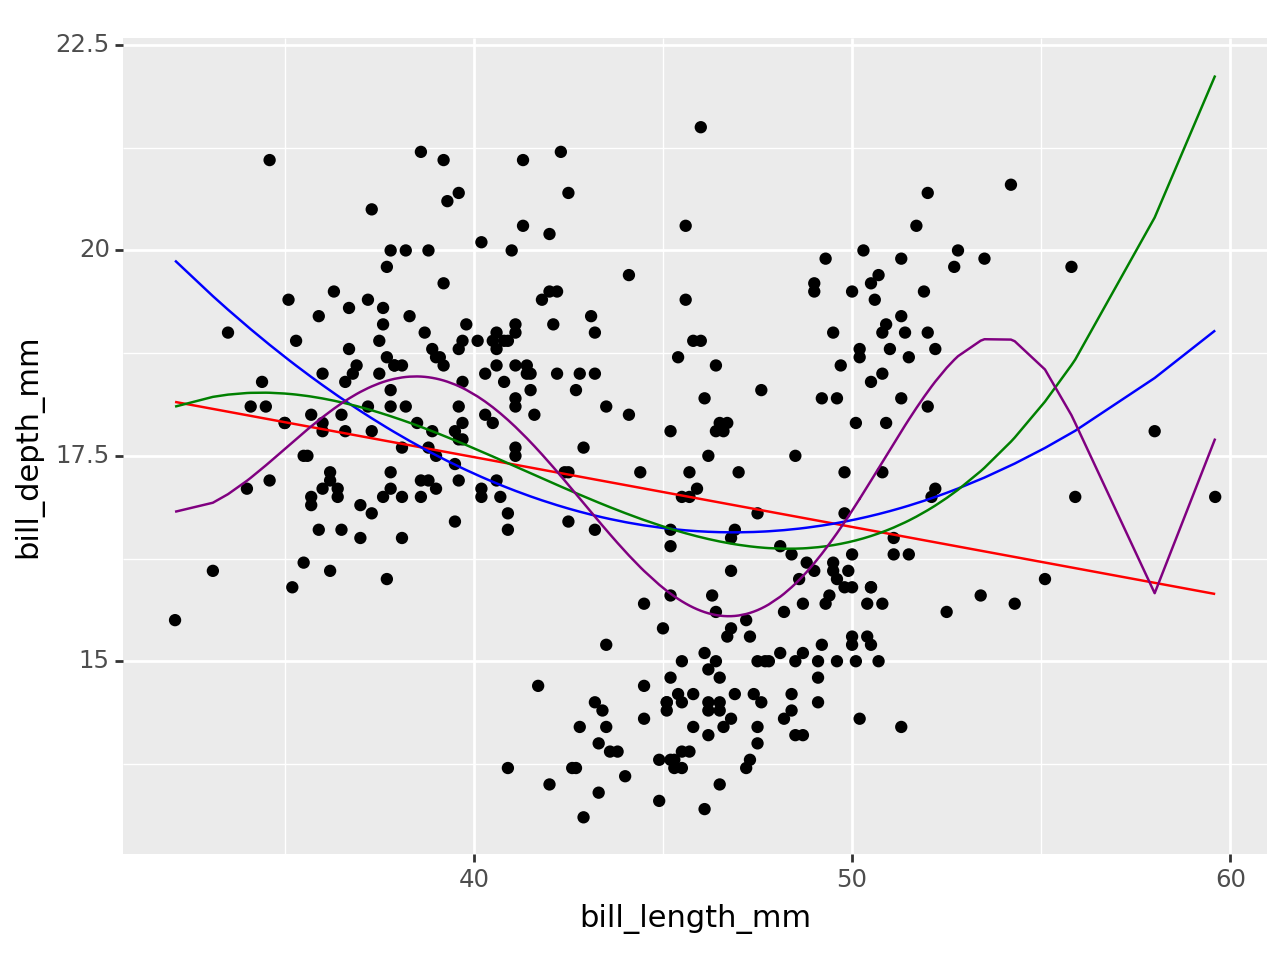

<Figure Size: (640 x 480)>

In [ ]:
(p9.ggplot(penguins, p9.aes(x = 'bill_length_mm', y = 'bill_depth_mm')) + p9.geom_point()
+ p9.geom_line(p9.aes(y='bill_depth_lr'), color = 'red')
+ p9.geom_line(p9.aes(y='bill_depth_qr'), color = 'blue')
+ p9.geom_line(p9.aes(y='bill_depth_cb'), color = 'green')
+ p9.geom_line(p9.aes(y='bill_depth_poly'), color = 'purple')
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

I would say the quadratic and especially the simple linear model are underfitted. They are not capturing the up and down curve of this data as well.

The degree 10 polynomial is likely overfitted. It is oversensitive to noise in the data.

This means the cubic model is the best, though it still isn't a great fit.